# WeatherPy
----

### Analysis (Also in README)
* In general temperatures are warmer nearer the equator, but some of the warmest temperatures occur just below the equator at about -20 Deg. Latitude.

* There is no strong relationship between latitude and humidity, and most cities have between 80-100% humidity. Interestingly, while the equator has high humidity (about 70-100%), several cities just beyond it at 20 Deg. Latitude and -20 Deg. Latitude have some of the lowest recorded humidity (about 10-30%).

* Although there is no strong relationship between latitude and wind speed, and most cities across latitudes have about 0-15mph speeds, many of the higher wind speeds tend to occur further from the equator.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

In [4]:
# create df to store api data
cities_df = pd.DataFrame(cities)
cities_df.head()

,0
0,severo-kurilsk
1,cape town
2,luderitz
3,hermanus
4,los llanos de aridane


In [6]:
# rename column
cities_df = cities_df.rename(columns={0: "City"})
cities_df.head()

,City
0,severo-kurilsk
1,cape town
2,luderitz
3,hermanus
4,los llanos de aridane


In [7]:
# set up additional columns to hold information
cities_df['Cloudiness'] = ""
cities_df['Country'] = ""
cities_df['Date'] = ""
cities_df['Humidity'] = ""
cities_df['Lat'] = ""
cities_df['Lng'] = ""
cities_df['Max Temp'] = ""
cities_df['Wind Speed'] = ""

cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,severo-kurilsk,,,,,,,,
1,cape town,,,,,,,,
2,luderitz,,,,,,,,
3,hermanus,,,,,,,,
4,los llanos de aridane,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [32]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
params = {
    "units": "imperial",
    "appid": api_key,
}

print("Beginning Data Retrieval")
print("-----------------------------")

# use iterrows to iterate through pandas dataframe
for index, row in cities_df.iterrows():

    # get city name from df
    city_name = row['City']
    
    # update address key value
    params['q'] = city_name

    # assemble url and make API request
    print(f"Processing Record {index} of Set 1 | {city_name}")
    response = requests.get(base_url, params=params).json()

    
    try:
        
        cities_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        cities_df.loc[index, 'Country'] = response['sys']['country']
        cities_df.loc[index, 'Date'] = response['dt']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Lat'] = response['coord']['lat']
        cities_df.loc[index, 'Lng'] = response['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | severo-kurilsk
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | luderitz
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | los llanos de aridane
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | coquimbo
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | cabedelo
Processing Record 13 of Set 1 | mogocha
Processing Record 14 of Set 1 | teguldet
Processing Record 15 of Set 1 | gizo
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | tasiilaq
Processing Record 19 of Set 1 | colquiri
Processing Record 20 of Set 1 | palabuhanratu
City not foun

Processing Record 185 of Set 1 | cascais
Processing Record 186 of Set 1 | clyde
Processing Record 187 of Set 1 | srivardhan
Processing Record 188 of Set 1 | binzhou
Processing Record 189 of Set 1 | gimli
Processing Record 190 of Set 1 | urucara
Processing Record 191 of Set 1 | middle island
Processing Record 192 of Set 1 | san cristobal
Processing Record 193 of Set 1 | kabalo
Processing Record 194 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 195 of Set 1 | arman
Processing Record 196 of Set 1 | port blair
Processing Record 197 of Set 1 | kayerkan
Processing Record 198 of Set 1 | cockburn town
Processing Record 199 of Set 1 | komsomolskiy
Processing Record 200 of Set 1 | kununurra
Processing Record 201 of Set 1 | chorozinho
Processing Record 202 of Set 1 | miraflores
Processing Record 203 of Set 1 | samarai
Processing Record 204 of Set 1 | guelengdeng
City not found. Skipping...
Processing Record 205 of Set 1 | grindavik
Processing Record 206 of Set 1 

Processing Record 367 of Set 1 | husavik
Processing Record 368 of Set 1 | morgan city
Processing Record 369 of Set 1 | adrar
Processing Record 370 of Set 1 | bac lieu
City not found. Skipping...
Processing Record 371 of Set 1 | savannah bight
Processing Record 372 of Set 1 | kangaatsiaq
Processing Record 373 of Set 1 | prince george
Processing Record 374 of Set 1 | bridlington
Processing Record 375 of Set 1 | namibe
Processing Record 376 of Set 1 | beringovskiy
Processing Record 377 of Set 1 | marsh harbour
Processing Record 378 of Set 1 | chuy
Processing Record 379 of Set 1 | nokaneng
Processing Record 380 of Set 1 | saint-pierre
Processing Record 381 of Set 1 | placido de castro
Processing Record 382 of Set 1 | warqla
City not found. Skipping...
Processing Record 383 of Set 1 | mundo nuevo
Processing Record 384 of Set 1 | batemans bay
Processing Record 385 of Set 1 | gravdal
Processing Record 386 of Set 1 | subtanjalla
Processing Record 387 of Set 1 | alice springs
Processing Record 

Processing Record 546 of Set 1 | linfen
Processing Record 547 of Set 1 | hualmay
Processing Record 548 of Set 1 | bath
Processing Record 549 of Set 1 | kegayli
City not found. Skipping...
Processing Record 550 of Set 1 | guarapari
Processing Record 551 of Set 1 | borogontsy
Processing Record 552 of Set 1 | neiafu
Processing Record 553 of Set 1 | douglas
Processing Record 554 of Set 1 | poso
Processing Record 555 of Set 1 | abonnema
Processing Record 556 of Set 1 | ambodifototra
City not found. Skipping...
Processing Record 557 of Set 1 | agirish
Processing Record 558 of Set 1 | suntar
Processing Record 559 of Set 1 | zhanaozen
Processing Record 560 of Set 1 | varjota
Processing Record 561 of Set 1 | san juan
Processing Record 562 of Set 1 | port-de-paix
City not found. Skipping...
Processing Record 563 of Set 1 | lorengau
Processing Record 564 of Set 1 | fushan
Processing Record 565 of Set 1 | praxedis guerrero
Processing Record 566 of Set 1 | pontianak
Processing Record 567 of Set 1 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
# Save as a csv
cities_df.to_csv("weatherpy_data.csv", encoding="utf-8", index=False)

In [19]:
cities_df.count()

City          637
Cloudiness    637
Country       637
Date          637
Humidity      637
Lat           637
Lng           637
Max Temp      637
Wind Speed    637
dtype: int64

In [23]:
# check data types
cities_df.dtypes

City          object
Cloudiness    object
Country       object
Date          object
Humidity      object
Lat           object
Lng           object
Max Temp      object
Wind Speed    object
dtype: object

In [24]:
# convert to float in order to plot
cities_df['Cloudiness'] = pd.to_numeric(cities_df['Cloudiness'])
cities_df['Humidity'] = pd.to_numeric(cities_df['Humidity'])
cities_df['Lat'] = pd.to_numeric(cities_df['Lat'])
cities_df['Max Temp'] = pd.to_numeric(cities_df['Max Temp'])
cities_df['Wind Speed'] = pd.to_numeric(cities_df['Wind Speed'])

In [25]:
# check data types
cities_df.dtypes

City           object
Cloudiness    float64
Country        object
Date           object
Humidity      float64
Lat           float64
Lng            object
Max Temp      float64
Wind Speed    float64
dtype: object

In [41]:
# Display the DataFrame
cities_df.head(30)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,severo-kurilsk,32.0,RU,1541222180,92.0,50.68,156.12,41.67,6.96
1,cape town,0.0,ZA,1541217600,81.0,-33.93,18.42,53.60,3.36
2,luderitz,32.0,NA,1541217600,93.0,-26.65,15.16,55.40,14.99
3,hermanus,76.0,ZA,1541222181,51.0,-34.42,19.24,62.37,2.93
4,los llanos de aridane,68.0,ES,1541221200,77.0,28.66,-17.92,68.00,11.41
5,hobart,0.0,AU,1541219400,31.0,-42.88,147.33,60.80,23.04
6,jamestown,20.0,AU,1541222181,34.0,-33.21,138.6,76.37,6.96
7,ushuaia,75.0,AR,1541217600,30.0,-54.81,-68.31,53.60,21.92
8,nizhneyansk,NaN,,,NaN,NaN,,NaN,NaN
9,taolanaro,NaN,,,NaN,NaN,,NaN,NaN


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

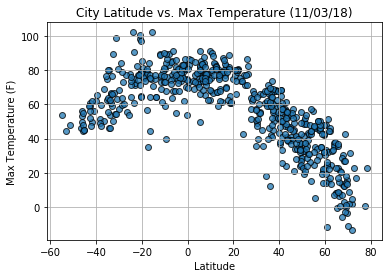

In [37]:
# Build a scatter plot for each data type
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (11/03/18)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

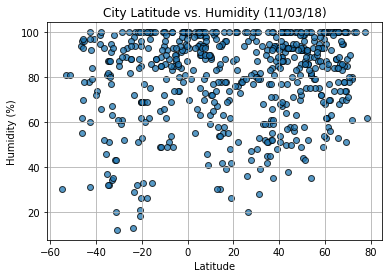

In [38]:
# Build a scatter plot for each data type
plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (11/03/18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvHumid.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

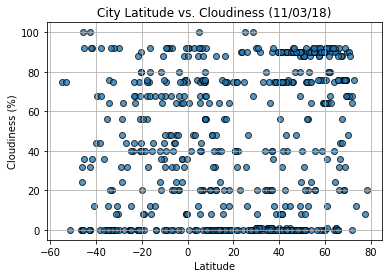

In [39]:
# Build a scatter plot for each data type
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (11/03/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvCloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

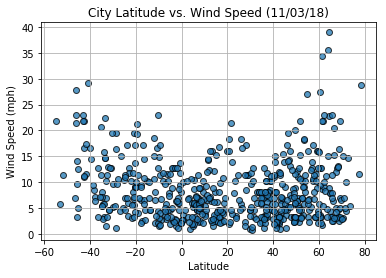

In [40]:
# Build a scatter plot for each data type
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (11/03/18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvWind.png")

# Show plot
plt.show()